# Ordinal Features
> Some categorical features are order sensitive

In [42]:
from ucimlrepo import fetch_ucirepo                     # Fetch datasets from the UCIML Repository

# Data Science ___________________________________________________________________________________
import pandas as pd

# Data Visualization _____________________________________________________________________________
import seaborn as sns
import matplotlib.pyplot as plt                              # Missing data visualization

# Encoding _______________________________________________________________________________________
from sklearn.preprocessing import OrdinalEncoder

# Utils __________________________________________________________________________________________
import sys  
sys.path.insert(1, '../utils')
import preprocess as pp

In [43]:
# Fetch and preprocessing
df = fetch_ucirepo(id=144).data.original
df = pp.preprocess_dtypes(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Attribute1   1000 non-null   category
 1   Attribute2   1000 non-null   int64   
 2   Attribute3   1000 non-null   category
 3   Attribute4   1000 non-null   category
 4   Attribute5   1000 non-null   int64   
 5   Attribute6   1000 non-null   category
 6   Attribute7   1000 non-null   category
 7   Attribute8   1000 non-null   int64   
 8   Attribute9   1000 non-null   category
 9   Attribute10  1000 non-null   category
 10  Attribute11  1000 non-null   int64   
 11  Attribute12  1000 non-null   category
 12  Attribute13  1000 non-null   int64   
 13  Attribute14  1000 non-null   category
 14  Attribute15  1000 non-null   category
 15  Attribute16  1000 non-null   int64   
 16  Attribute17  1000 non-null   category
 17  Attribute18  1000 non-null   int64   
 18  Attribute19  1000 non-null   

# 1 Checking account 
BEFORE
```
- A11 :      ... <    0 DM
- A12 : 0 <= ... <  200 DM
- A13 :      ... >= 200 DM / salary assignments for at least 1 year
- A14 : no checking account
```

AFTER
```
- A11 : no checking account
- A12 :      ... <    0 DM
- A13 : 0 <= ... <  200 DM
- A14 :      ... >= 200 DM / salary assignments for at least 1 year
```

ORDER / WEIGHTS
``` 
A11 : 2
A12 : 3
A13 : 4
A14 : 1
```

<Axes: xlabel='Attribute1', ylabel='percent'>

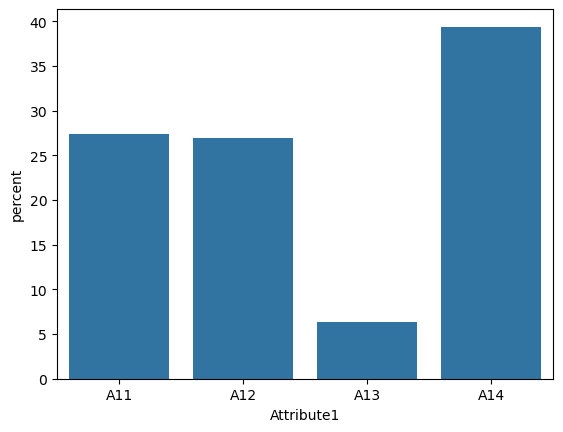

In [44]:
# Count before
sns.countplot(
    data = df,
    x = 'Attribute1',
    stat='percent'
)

In [57]:
# Ordinal Encoding

# Define the weights for encoding
weights = {
    'A11': 1,
    'A12': 2,
    'A13': 3,
    'A14': 0
}

# Order classes by weight
ordered_by_weight = sorted(weights, key=weights.get)

# Encode
encoder = OrdinalEncoder(categories=[ordered_by_weight])
df['Attribute1_encoded'] = encoder.fit_transform(df[['Attribute1']]).astype(int)


Text(0.5, 1.0, 'New Encoded Attribute1')

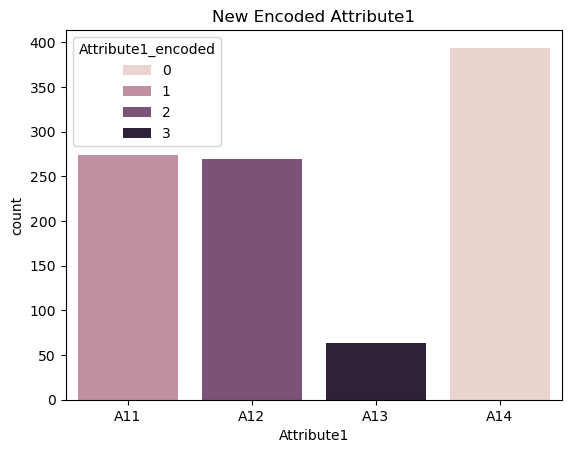

In [58]:
# Plot the new encoded attribute 1
sns.countplot(
    data = df,
    x = 'Attribute1',
    hue = 'Attribute1_encoded',
)
plt.title('New Encoded Attribute1')

In [ ]:
# TODO: find all the order sensitive columns 
# TODO: weight the classes in dictionaries
# TODO: sort the classes by weight in the dictionary
# TODO: encode all the columns 